# Processing a Folder of Tip Logs
TODO(later): add option to skip recomputation of cached results<br>
Tim Tyree<br>
1.18.2021


In [1]:
from lib.my_initialization import *
from lib import *

from lib.my_initialization import *
from lib.utils.utils_traj import *

from lib.utils.operari import *

import trackpy, pandas as pd, numpy as np
from lib import *
from lib.routines.track_tips import *
from lib.utils.dist_func import *
from lib.utils.utils_traj import *

from lib.routines.compute_trajectories import *
from lib.routines.dag_log_to_msd import *
from lib.routines.compute_msd import *

import trackpy
%autocall 1
%load_ext autoreload
%autoreload 2
# awareness&chill

Automatic calling is: Smart


In [2]:
# #make plots in darkmode
# import seaborn as sns
# from jupyterthemes import jtplot
# jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

In [3]:
#TODO: turn the diffcoef_summary into a .csv update instead of overwriting

# (ignore dev) generate msd figures

In [3]:
# #find file interactively
# print("please select a file from within the desired folder.")
# file = search_for_file()
file='/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/param_qu_tmax_30_Ko_5.4_diffCoef_0.0005_dt_0.5/Log/ic001.21_log.csv'
print(file)
# file='/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-2/ds_2_param_set_8/Log/ic_200x200.001.12_log.csv'

ds=5
width=200
height=width
DS=ds/width

# input_fn=search_for_file()
input_fn=f"/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-fk-200x200/param_set_8_ds_5.0_tmax_10_diffCoef_0.0005/Log/ic200x200.0.3_traj_sr_400_mem_0.csv"
df=pd.read_csv(input_fn)
print(input_fn)
DT=compute_DT(df,round_t_to_n_digits=3);print(f"the time resolution is {DT} ms.")


trgt='log.csv'
assert(file[-len(trgt):]==trgt)

file_name_list=get_all_files_matching_pattern(file,trgt)
print(f"number of files in list: {len(file_name_list)}")
os.chdir(nb_dir)

/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/param_qu_tmax_30_Ko_5.4_diffCoef_0.0005_dt_0.5/Log/ic001.21_log.csv
number of files in list: 159


In [12]:
#generate trajectories, unwrapped trajectories, and mean squared displacements for folder of tip logs
ds=5
width=200
kwargs={
    'input_fn_lst':file_name_list,
    'L':width,
    'DS':ds/width,
    'use_cache_0':True,
    'use_cache_1':True,
    'npartitions':12,
    'sr':600,
    'mem':0
}


Frame 18418: 2 trajectories present.


In [18]:
retval=run_routine_log_to_unwrapped_trajectory(input_file_name=file,use_cache=True, **kwargs)

Frame 13406: 6 trajectories present.


In [19]:
#TODO: generate annihilation/creation events for folder of trajectories
beep(3)
retval

'/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/param_qu_tmax_30_Ko_5.4_diffCoef_0.0005_dt_0.5/trajectories_unwrap/ic001.21_traj_sr_600_mem_0_unwrap.csv'

In [ ]:
df_summary=workflow_reduce_logs_to_diffcoeff_summary(**kwargs)
beep(7)

In [ ]:
min_duration=20. #ms
min_range   =1.  #cm

kwargs={
    'width':width,
    'height':height,
    'ds':ds,
    'printing':False,
    'min_range':min_range,
    'min_duration':min_duration,
}
routine_traj_to_creation=get_routine_traj_to_creation(**kwargs)

def routine(input_fn):
    return routine_traj_to_creation(input_fn)

In [3]:
# make unwrapped trajectory for file_name_list
# run_routine_log_to_msd
# # b = db.from_sequence(file_name_list[:2], npartitions=2).map(run_routine_log_to_msd)
# b = db.from_sequence(file_name_list, npartitions=2).map(run_routine_log_to_msd)
# start = time.time()
# retval = list(b)
# print(f"run time for generating trajectories from file_name_list: {time.time()-start:.2f} seconds.")
# beep(3)
# output_file_name_list=retval
# print(len(output_file_name_list))

In [5]:
# #compute mean squared displacements, aggregating results
# n_tips=1; DT=1.
# file_out=output_file_name_list[0]
# # file_out='/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-2/ds_1_param_set_8/trajectories/ic_200x200.011.11_traj_sr_400_mem_0_unwrap.csv'
# # file_out='/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-2/ds_2_param_set_8/trajectories/ic_200x200.011.11_traj_sr_400_mem_0_unwrap.csv'
# retval=gen_msd_figs(file_out,n_tips, DT)#, V_thresh=0.4)

In [6]:
# file_out='/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-2/ds_2_param_set_8/trajectories/ic_200x200.011.11_traj_sr_400_mem_0_unwrap.csv'
# retval=gen_msd_figs(file_out,n_tips, DT)#, V_thresh=0.4)

# (ignore dev) find dag workflow for one trial and give it a caching option
- Hint: use os.path.exists(fn)

In [7]:
#TODO: make a function that _for one trial_folder_ computes all analysis steps from tracking to diffcoeff output
##################
# Scrum: 1.23.2021
##################
#TODO: make a function that _for one trial_folder_ computes all analysis steps from tracking to diffcoeff output
#TODO: give ^this function a kwarg option use_cached_files=True, that looks for files already existing 
#TODO: make a function that computes all analysis steps from tracking to diffcoeff table
#TODO: give ^this function a kwarg option use_cached_files=True, that looks for files already existing 
#TODO(later): make viewer for data, where I give a trial_folder and it shows me all the plots for it

In [5]:
# find dag workflow for one trial and give it a caching option
# - Hint: use os.path.exists(fn)
# msd_fig_gener

In [2]:
# def msd_fig_gener(input_file_name,n_tips=1):
#     trgt='_unwrap.csv'
#     assert(input_file_name[-len(trgt)]==trgt)
#     #Generate msd figures for input_file_name
#     dirname = os.path.dirname(input_file_name).split('/')[-1]
#     folder_name=os.path.dirname(input_file_name)
#     save_folder = folder_name.replace(dirname,'msd')
#     output_file_name = f"emsd_longest_by_trial_tips_ntips_{n_tips}.csv"
#     #determine DT
#     df=pd.read_csv(input_file_name)
#     DT=df.t.head(2).diff().dropna().values[0]
#     retval=gen_msd_figs(file_out,n_tips, DT)#, V_thresh=0.4)
#     return retval

In [11]:
# n_tips=1
# use_cache=True
# input_file_name='/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-2/ds_2_param_set_8/trajectories/ic_200x200.011.11_traj_sr_400_mem_0_unwrap.csv'
# msd_fig_gener(input_file_name,n_tips)

1.0

In [22]:
#compute the ensemble mean squared displacements for each trial
#determine DT
input_file_name=file_name_list[0]
df=pd.read_csv(input_file_name)
DT=df.t.head(2).diff().dropna().values[0]
os.chdir(save_folder)
if not use_cache or not os.path.exists(output_file_name):
    
    output_file_name=generate_msd_figures_routine_for_list(file_name_list, n_tips,DT=DT,put_file_name=None,save_folder=None,**kwargs):


In [19]:
save_folder

'/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-2/ds_2_param_set_8/msd'

# define module for diffusion analysis pipeline

In [6]:
run_routine_log_to_unwrapped_trajectory

<function lib.routines.dag_log_to_msd.run_routine_log_to_unwrapped_trajectory(input_file_name, sr, mem, L, use_cache=True, DS=0.025, **kwargs)>

In [7]:
from lib.routines.dag_log_to_msd import *
dag_a_postprocess

<function lib.routines.dag_log_to_msd.dag_a_postprocess(emsd_fn, trial_folder_name, dir_out, **kwargs)>

In [13]:
# def run_routine_log_to_unwrapped_trajectory(input_file_name,sr, mem,L,  use_cache=True, DS=0.025, **kwargs):
#     '''ic is a .csv file name of a tip log.'''
#     traj_fn = os.path.abspath(input_file_name).replace('/Log','/trajectories').replace('log.csv', f'traj_sr_{sr}_mem_{mem}.csv')
#     output_file_name = traj_fn.replace('/trajectories','/trajectories_unwrap').replace('.csv',"_unwrap.csv")
#     if not use_cache or not os.path.exists(traj_fn):
#         traj_fn = generate_track_tips_pbc(input_file_name, save_fn=traj_fn,sr=sr,mem=mem, width=L,height=L)#,**kwargs)
#     if not use_cache or not os.path.exists(output_file_name):
#         retval_ignore = unwrap_trajectories(traj_fn, output_file_name,width=L,height=L,DS=DS)      
#     return os.path.abspath(output_file_name)

# def run_routine_unwrapped_trajectories_to_diffcoeff_summary(file_name_list,trial_folder_name,L,DS,use_cache=True,n_tips=1,**kwargs):
#     '''file_name_list is a list of strings locating files ending in _unwrap.csv'''
#     input_file_name=file_name_list[0]
#     #determine DT
#     df=pd.read_csv(input_file_name)
#     DT=df.t.head(2).diff().dropna().values[0]
#     dirname = os.path.dirname(input_file_name).split('/')[-1]
#     folder_name=os.path.dirname(input_file_name)
#     save_folder = folder_name.replace(dirname,'msd')
#     emsd_fn = os.path.join(save_folder,f"emsd_longest_by_trial_tips_ntips_{n_tips}.csv")
#     if not os.path.exists(save_folder):
#         os.mkdir(save_folder)
#     os.chdir(save_folder)
#     if not use_cache or not os.path.exists(emsd_fn):
#         #compute the ensemble mean squared displacements for each trial
#         emsd_fn=generate_msd_figures_routine_for_list(file_name_list, n_tips, DT=DT,DS=DS,
#                                                                output_file_name=emsd_fn,L=L,
#                                                                save_folder=save_folder,**kwargs)
#     #compute the diffusion coefficient summary
#     os.chdir(os.path.dirname(emsd_fn))
#     dir_out=os.path.join(save_folder,"diffcoeff_summary_"+os.path.basename(emsd_fn))
#     if not use_cache or not os.path.exists(dir_out):
#         dir_out = dag_a_postprocess(emsd_fn=emsd_fn,
#                                 trial_folder_name=trial_folder_name,
#                                 dir_out=dir_out,**kwargs)
#     return dir_out

# def workflow_reduce_logs_to_diffcoeff_summary(input_fn_lst, L,DS,use_cache_0=True,use_cache_1=False, npartitions=2, **kwargs):
#     print(f"the total number of trials recorded is {len(input_fn_lst)}")
#     def routine(fn):
#         output_file_name=run_routine_log_to_unwrapped_trajectory(fn, use_cache=use_cache_0,L=L,**kwargs)
#         return output_file_name
#     b = db.from_sequence(input_fn_lst, npartitions=npartitions).map(routine)
#     file_name_list = list(b)
#     print(f'reducing {len(file_name_list)} unwrapped trajectories files to a single row describing the diffusion coefficient of spiral tips for that trial...')
#     #reduce reduce_logs_to_diffcoeff_summary
#     df_out= run_routine_unwrapped_trajectories_to_diffcoeff_summary(file_name_list,use_cache=use_cache_1,DS=DS,L=L,**kwargs)
#     return df_out
    


# def get_all_logs(trial_folder,trial_folder_name):
#     cwd=os.getcwd()
#     file=f"{trial_folder}/Log/ic_200x200.001.12_log.csv"
#     trgt='log.csv'
#     assert(file[-len(trgt):]==trgt)
#     input_fn_lst=get_all_files_matching_pattern(file,trgt)
#     # print(len(input_fn_lst))
#     os.chdir(cwd)
#     return input_fn_lst

# def gen_diffcoeff_summary(trial_folder_name,L,DS,ic_suite_fn,**kwargs):
#     #find all log files for each trial folder
#     trial_folder=f"{ic_suite_fn}/{trial_folder_name}"
#     input_fn_lst= get_all_logs(trial_folder,trial_folder_name)
#     print(f"{trial_folder_name} contains {len(input_fn_lst)} tip logs")
#     #reduce that trial folder to a single diffusion coefficient row
#     diffcoeff_summary_fn=workflow_reduce_logs_to_diffcoeff_summary(
#         input_fn_lst,L=L,DS=DS,trial_folder_name=trial_folder_name,
#         use_cache_0=True,**kwargs)
#     return diffcoeff_summary_fn


# # def get_all_trial_folders_not_archived(ic_suite_fn):
# #     os.chdir(ic_suite_fn)
# #     dir_lst=os.listdir()
# #     trial_folder_name_lst=[]
# #     for dir_run in dir_lst:
# #         # dir_run=dir_lst[0]
# #         trial_folder_name=dir_run
# #         #test if trial_folder_name is not a folder
# #         boo  = os.path.isdir(trial_folder_name)
# #         #test if trial_folder_name starts with ic
# #         boo &=trial_folder_name[:2]!='ic'
# #         #test if trial_folder_name contains archiv
# #         boo &=trial_folder_name.find('archiv')==-1
# #         #if not, append it to the trial_folder_name_lst
# #         if boo:
# #             trial_folder_name_lst.append(trial_folder_name)
# #     return trial_folder_name_lst

# # #find all log files for a given trial
# # trial_folder_name='ds_5_param_set_3'
# # trial_folder=f"{nb_dir}/Data/initial-conditions-suite-2/{trial_folder_name}"
# # input_fn_lst= get_all_logs(trial_folder,trial_folder_name)
# # print(len(input_fn_lst))

# #DONE: test workflow_reduce_logs_to_diffcoeff_summary runtime on trial_folder with cached results
# # pipeline to run up to an individual data run (workflow_reduce_logs_to_diffcoeff_summary)

# def diffcoeff_table_gener(ic_suite_fn,L,DS,trial_folder_name_lst,dict_kwargs_trial,npartitions=2,**kwargs_table):
#     #generate the diffusion table
#     for trial_folder_name in trial_folder_name_lst:
#         kwargs_trial= dict_kwargs_trial[trial_folder_name]
#         kwargs_trial.update(kwargs_table)
#         print(f'beginning diffusion analysis of {trial_folder_name}...')
#         diffcoeff_summary_fn= gen_diffcoeff_summary(trial_folder_name,L=L,ic_suite_fn=ic_suite_fn,npartitions=npartitions,DS=DS,**kwargs_trial)
#     #reduce
#     retval= gen_diffcoeff_table(ic_suite_fn,trial_folder_name_lst=trial_folder_name_lst,**kwargs_table)
#     return retval

# FK model analysis pipeline

In [45]:
ic_suite_fn=f"{nb_dir}/Data/initial-conditions-suite-2"
trial_folder_name_lst=get_all_trial_folders_not_archived(ic_suite_fn)    
#initialize dict_kwargs_trial
dict_kwargs_trial={}
for fn in trial_folder_name_lst:
    dict_kwargs_trial[fn]={}
    
#add any custom changes to instances of the analysis pipeline
dict_kwargs_trial['ds_5_param_set_3']['duration_thresh']=.35
# # other parameters of potential interest
# tau_min=.15, n_tips=1,DT=1., 
print(trial_folder_name_lst)

['ds_5_param_set_8_fastkernel_V_0.4', 'ds_5_param_set_4', 'ds_5_param_set_8_og', 'ds_5_param_set_8_fastkernel_V_0.5', 'ds_10_param_set_8_og', 'ds_5_param_set_8_fastkernel_V_0.6', 'ds_1_param_set_8', 'ds_5_param_set_3', 'ds_2_param_set_8']


In [46]:
trial_folder_name_lst=['ds_5_param_set_8_fastkernel_V_0.4','ds_5_param_set_3','ds_5_param_set_4','ds_5_param_set_8_og','ds_10_param_set_8_og']

In [ ]:
retval= diffcoeff_table_gener(ic_suite_fn,trial_folder_name_lst,dict_kwargs_trial,npartitions=2)

beep(10)
print(f"retval is {retval}")

Frame 300000: 19 trajectories present.


In [ ]:
# diffcoeff_summary_fn= gen_diffcoeff_summary(trial_folder_name,ic_suite_fn,**kwargs_trial)


In [114]:
#DONE: test workflow_reduce_logs_to_diffcoeff_summary runtime on trial_folder with cached results
# pipeline to run up to an individual data run (workflow_reduce_logs_to_diffcoeff_summary)

# # def gener_diffcoeff_table(ic_suite_fn,trial_folder_name_lst,**kwargs):
# #TODO: generate the diffusion table
# for trial_folder_name in trial_folder_name_lst:
#     kwargs_trial= dict_kwargs_trial[trial_folder_name]
#     print(f'beginning diffusion analysis of {trial_folder_name}...')
#     diffcoeff_summary_fn= gen_diffcoeff_summary(trial_folder_name,ic_suite_fn,npartitions=6,**kwargs_trial)


'ds_2_param_set_8'

# LR model analysis pipeline

In [10]:
print('please select a (local) log file')
file=search_for_file()

please select a (local) log file
File: /home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/param_qu_tmax_30_Ko_50_diffCoef_0.001/Log/ic001.13_log.csv


In [11]:
# file='/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/param_qu_tmax_30_Ko_3.8/Log/ic001.13_log.csv'

In [8]:
trial_folder=os.path.basename(os.path.dirname(os.path.dirname(file)))
trial_folder

'param_qu_tmax_30_Ko_5.4_diffCoef_0.0005_dt_0.5'

In [9]:
ic_suite_fn=os.path.dirname(os.path.dirname(os.path.dirname(file)))
# ic_suite_fn=f"{nb_dir}/Data/initial-conditions-suite-3-LR"
trial_folder_name_lst=get_all_trial_folders_not_archived(ic_suite_fn)    
#initialize dict_kwargs_trial
dict_kwargs_trial={}
for fn in trial_folder_name_lst:
    dict_kwargs_trial[fn]={}
    
#add any custom changes to instances of the analysis pipeline
# dict_kwargs_trial['ds_5_param_set_3']['duration_thresh']=.35
# # other parameters of potential interest
# tau_min=.15, n_tips=1,DT=1., 
print(trial_folder_name_lst)

['param_qu_tmax_30_Ko_3.8_diffCoef_0.00075', 'ds_5_param_qu_tmax_30_Ko_7.0_diffCoef_0.001', 'param_qu_tmax_30_Ko_5.4_diffCoef_0.0005_dt_0.025', 'ds_5_param_qu_tmax_1', 'ds_2_param_qu_tmax_10', 'sv', 'ds_5_param_qu_tmax_1_deprec_V_-60.', 'param_qu_tmax_30_Ko_3.8_diffCoef_0.001', 'ds_5_param_qu_tmax_10_Ko_5.4', 'ds_5_param_qu_tmax_10_Ko_7', 'ds_7.5_param_qu_tmax_30', 'param_qu_tmax_30_Ko_5.4_diffCoef_0.0005_dt_0.5', 'param_qu_tmax_30', 'ds_5_param_qu_tmax_30_Ko_5.4_diffCoef_0.001', 'ds_10_param_qu_tmax_30', 'param_qu_tmax_30_Ko_3.8_diffCoef_0.0005', 'ds_5_param_qu_tmax_10', 'param_qu_tmax_30_Ko_50_diffCoef_0.001']


In [19]:
# trial_folder_name_lst=['ds_7.5_param_qu_tmax_30']#'ds_5_param_qu_tmax_10_Ko_7','ds_5_param_qu_tmax_30_Ko_5.4']
# trial_folder_name_lst=['ds_5_param_qu_tmax_10',
# trial_folder_name_lst=['ds_5_param_qu_tmax_30_Ko_5.4']
# trial_folder_name_lst=['ds_5_param_qu_tmax_30_Ko_7.0', 'ds_7.5_param_qu_tmax_30', 'ds_10_param_qu_tmax_30','ds_5_param_qu_tmax_30_Ko_5.4']
# trial_folder_name_lst=['param_qu_tmax_30_Ko_3.8']
# trial_folder_name_lst=[ 'param_qu_tmax_30_Ko_3.8_diffCoef_0.0005','param_qu_tmax_30_Ko_3.8_diffCoef_0.00075']
trial_folder_name_lst=[trial_folder]

In [20]:
retval= diffcoeff_table_gener(ic_suite_fn=ic_suite_fn,trial_folder_name_lst=trial_folder_name_lst,
                              dict_kwargs_trial=dict_kwargs_trial,L=200,
                              npartitions=9, use_cache_1=True, R2_thresh=0.0,duration_thresh=.0, tau_min=0.,
                             sr=600,mem=0,DS=0.025)#width=200,height=200
beep(2)
print(f"retval is {retval}")

Frame 1888: 2 trajectories present.
reducing 158 unwrapped trajectories files to a single row describing the diffusion coefficient of spiral tips for that trial...
Num. file names in list = 158.
ValueError: No objects to concatenate
	trial that failed: ic018.23_traj_sr_600_mem_0_unwrap.csv
saved figure in 
	/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/param_qu_tmax_30_Ko_50_diffCoef_0.001/msd/fig
saved figure in 
	/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/param_qu_tmax_30_Ko_50_diffCoef_0.001/msd/fig
saved figure in 
	/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/param_qu_tmax_30_Ko_50_diffCoef_0.001/msd/fig
generating diffcoeff_figures for param_qu_tmax_30_Ko_50_diffCoef_0.001
	num. trials that didn't show a tip lasing longer than 0ms is 0, and that didn't show am Rsquared of at least 0.0 is 12
saved diffcoeff_summary to /home/timothytyree/Documents/GitHub/care/

In [ ]:
#add any custom changes to instances of the analysis pipeline
# dict_kwargs_trial['ds_5_param_set_3']['duration_thresh']=.35
# # other parameters of potential interest
# tau_min=.15, n_tips=1,DT=1., 

# diffcoeff_summary_fn= gen_diffcoeff_summary(trial_folder_name,ic_suite_fn,**kwargs_trial)

In [13]:
#bare combine diffcoeff_summaries
# os.chdir(os.path.dirname(emsd_fn))
dir_out=os.path.join(save_folder,"diffcoeff_summary_"+os.path.basename(emsd_fn))
# if not use_cache or not os.path.exists(dir_out):
dir_out = dag_a_postprocess(emsd_fn=emsd_fn,
                        trial_folder_name=trial_folder_name,
                        dir_out=dir_out,**kwargs)

NameError: name 'save_folder' is not defined

# use functions from care_worker to track spiral tips

In [31]:
input_file_name = search_for_file()
# "/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-2/ds_5_param_set_8_fastkernel_V_0.4_archive/Log/ic_200x200.001.11_log.csv"
output_file_name = preprocess_log(input_file_name)


#select the longest n trajectories
n_tips = 1#15
s = df.groupby('particle').t.count()
s = s.sort_values(ascending=False)
pid_longest_lst = list(s.index.values[:n_tips])
# d = df[df.particle==pid_longest]
# print(pid_longest)
# print(s.head())
# pid_longest_lst = s.head(n_tips).values
df_traj = pd.concat([df[df.particle==pid] for pid in pid_longest_lst])
assert ( (np.array(sorted(set(df_traj['particle'].values)))==np.array(sorted(pid_longest_lst))).all())



File: /home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-lr-300x300/param_qu_tmax_30/Log/ic300x300.0.2_log.csv


TypeError: generate_track_tips_pbc() missing 4 required positional arguments: 'mem', 'sr', 'width', and 'height'

# define function that takes a folder of care_worker output and returns a df where each trial is represented no more than 1 time


In [6]:
file=search_for_file()

In [9]:
# log_folder="/Users/timothytyree/Documents/GitHub/care_worker/python/Log"
log_folder='/home/timothytyree/Documents/GitHub/care_worker/python/osg_output/Log'
os.chdir(log_folder)

In [10]:
input_fn_lst=[os.path.abspath(fn) for fn in os.listdir() if fn.find('job.out.')!=-1]
print(f"the number of output files in folder is {len(input_fn_lst)}.")

the number of output files in folder is 0.


In [11]:

# df.head()

In [11]:
# def read_inputs(line,trgt_lst):
#     input_lst=[]
#     for trgt in trgt_lst:
#         i=line.find(trgt)
#         l=len(trgt)
#         val=eval(line[i+l:].split(',')[0])
#         input_lst.append(val)
#     return input_lst

import re
def parse_inputs(line):
    result_keys = re.findall(r'\S+=', line)
    result_values = re.findall(r'=\d+', line) 
    if len(result_values)==0:
        pass
        #     return None
    input_dict={}
    for k,v in zip(result_keys,result_values):
        key=k.split('=')[0].split(',')[-1]
        value=eval(v.split('=')[-1])
        input_dict[key]=value
    return input_dict

def next_line(f):
    yield f.readline()

def parse_input_params(input_fn):
    line_no=0
    #read through until the outputs starts
    with open(input_fn) as f:
        for line in f:
            line_no+=1
            input_dict=parse_inputs(line)
            if len(list(input_dict))>0: 
                found_output=True
                return line_no, input_dict
    return -1,{}


In [12]:
def parse_input_fn(input_fn):
    printing=False
    line_no, input_dict=parse_input_params(input_fn)
    found_output=line_no!=-1
    if found_output and printing:
        print(f'the inputs found on line {line_no} were {input_dict}.')
    try:
        #         print(line_no)
        df=pd.read_csv(input_fn,header=line_no+1,delim_whitespace=True).astype({'n':int})
    except Exception:
        #only 1 line found in file, input_fn, skip
        return None
    
    df.drop(columns=['index'],inplace=True)
    df
    #reset frame number to start at zero
    df['frame']=df['frame']-df['frame'].values[0]
    #updating df...
    for k in input_dict.keys():
        df[k]=input_dict[k]

    index_labels=["L","txt_id1","txt_id2"]
    column_labels=["frame","x","y","particle","n","grad_ux","grad_uy","grad_vx","grad_vy"]
    df.set_index(keys=index_labels,inplace=True)#, columns=column_labels)
    # df=df[column_labels]
    return df

In [13]:
def return_df_updated_with_input_folder(input_fn_lst):#,df=None):
    """    returns df with this schema,
    multindex L|txt_id1|txt_id2|frame|particle
    and columns frame,x,y,n,t,grad_ux,grad_uy,grad_vx,grad_vy,particle
    input_fn='/Users/timothytyree/Documents/GitHub/care_worker/python/Log/job.out.8051248.703'
    """
    K12_index_set={}
    df_lst=[]
#     if df is None:
#         del df
    for input_fn in input_fn_lst:
        retval= parse_input_fn(input_fn)
        # df.unstack(1).unstack(1).head()
        if retval is not None:
            # TODO(optional for faster runtime): update a df_out only if it does not yet contain input_dict
            # TODO(optional test): assert that whenever an output is repeated, 
            # that their results are equal (to floating point precision)
            =retval.index.values[0][:3]
            src="{}_{}_{}".format(*K12_index)
            retval['src']=src
            #count if K12_index exists in the set of current index values
            try:
                K12_index_set[K12_index]+=1
            except KeyError:
                #then add K12_index to the set
                K12_index_set[K12_index]=0
                # K12_index_set.update({K12_index:0})
                df_lst.append(retval)
                print(f"the src={src} spiral tip lasted {retval.t.max()-retval.t.min()} ms.")
    print(K12_index_set)
    return df_lst,K12_index_set

In [14]:
df_lst,K12_index_set=return_df_updated_with_input_folder(input_fn_lst)

the src=239_2_0 spiral tip lasted 2074.0 ms.
the src=392_2_4 spiral tip lasted 5052.0 ms.
the src=267_3_14 spiral tip lasted 4314.0 ms.
the src=371_3_1 spiral tip lasted 3516.0 ms.
the src=371_1_5 spiral tip lasted 6032.0 ms.
the src=307_3_7 spiral tip lasted 3636.0 ms.
the src=214_1_37 spiral tip lasted 1660.0 ms.
the src=311_2_14 spiral tip lasted 2912.0 ms.
the src=434_2_3 spiral tip lasted 4854.0 ms.
the src=227_3_19 spiral tip lasted 3740.0 ms.
the src=362_3_6 spiral tip lasted 4890.0 ms.
the src=291_3_22 spiral tip lasted 3200.0 ms.
the src=278_1_12 spiral tip lasted 3262.0 ms.
the src=309_3_1 spiral tip lasted 4062.0 ms.
the src=498_1_3 spiral tip lasted 4348.0 ms.
the src=297_1_17 spiral tip lasted 2284.0 ms.
the src=234_3_15 spiral tip lasted 1412.0 ms.
the src=228_2_23 spiral tip lasted 1442.0 ms.
the src=225_3_33 spiral tip lasted 2704.0 ms.
the src=353_0_6 spiral tip lasted 6794.0 ms.
the src=430_2_5 spiral tip lasted 5052.0 ms.
the src=406_2_0 spiral tip lasted 4776.0 ms.


the src=429_0_3 spiral tip lasted 4764.0 ms.
the src=375_0_1 spiral tip lasted 4900.0 ms.
the src=296_1_15 spiral tip lasted 3648.0 ms.
the src=364_0_4 spiral tip lasted 5528.0 ms.
the src=239_3_19 spiral tip lasted 652.0 ms.
the src=458_0_2 spiral tip lasted 7898.0 ms.
the src=470_3_0 spiral tip lasted 4616.0 ms.
the src=366_0_3 spiral tip lasted 5134.0 ms.
the src=354_1_11 spiral tip lasted 572.0 ms.
the src=403_1_6 spiral tip lasted 5790.0 ms.
the src=292_1_6 spiral tip lasted 2688.0 ms.
the src=223_3_47 spiral tip lasted 240.0 ms.
the src=488_1_2 spiral tip lasted 4486.0 ms.
the src=269_1_21 spiral tip lasted 1706.0 ms.
the src=307_2_8 spiral tip lasted 2658.0 ms.
the src=427_0_8 spiral tip lasted 3990.0 ms.
the src=426_3_1 spiral tip lasted 3144.0 ms.
the src=254_0_12 spiral tip lasted 1560.0 ms.
the src=241_1_24 spiral tip lasted 3890.0 ms.
the src=384_1_4 spiral tip lasted 3412.0 ms.
the src=432_2_2 spiral tip lasted 4218.0 ms.
the src=421_3_3 spiral tip lasted 4874.0 ms.
the sr

the src=246_0_24 spiral tip lasted 2132.0 ms.
the src=316_0_3 spiral tip lasted 4032.0 ms.
the src=227_0_23 spiral tip lasted 2358.0 ms.
the src=425_1_2 spiral tip lasted 3854.0 ms.
the src=357_1_11 spiral tip lasted 3378.0 ms.
the src=201_2_20 spiral tip lasted 8.0 ms.
the src=256_3_27 spiral tip lasted 1798.0 ms.
the src=404_3_8 spiral tip lasted 2158.0 ms.
the src=217_0_34 spiral tip lasted 1450.0 ms.
the src=229_3_7 spiral tip lasted 1836.0 ms.
the src=363_2_4 spiral tip lasted 7842.0 ms.
the src=359_2_0 spiral tip lasted 3374.0 ms.
the src=394_1_6 spiral tip lasted 4286.0 ms.
the src=467_3_3 spiral tip lasted 5026.0 ms.
the src=403_0_6 spiral tip lasted 3918.0 ms.
the src=217_3_28 spiral tip lasted 1962.0 ms.
the src=358_2_11 spiral tip lasted 3604.0 ms.
the src=214_0_7 spiral tip lasted 2062.0 ms.
the src=210_1_30 spiral tip lasted 2062.0 ms.
the src=290_1_24 spiral tip lasted 3268.0 ms.
the src=268_0_22 spiral tip lasted 3676.0 ms.
the src=370_2_4 spiral tip lasted 6420.0 ms.
th

In [15]:
print(f"{len(list(K12_index_set))} distinct trials were successfully recorded.")

530 distinct trials were successfully recorded.


In [19]:
len(list(K12_index_set.values()))

530

In [20]:
df=pd.concat(df_lst)
df.head()

t  n          x         y  grad_ux  grad_uy  \
L   txt_id1 txt_id2                                                     
239 2       0        1844.0  6   0.000000  0.000000 -2.06868  5.42342   
            0        1846.0  6   5.151337  1.888168 -1.79723  5.18668   
            0        1848.0  6   8.037594  2.839096 -1.54593  4.89857   
            0        1850.0  6  10.420452  3.560852 -1.35436  4.68894   
            0        1852.0  6  12.554859  4.159058 -1.28145  4.63373   

                     grad_vx  grad_vy  frame  particle      src  
L   txt_id1 txt_id2                                              
239 2       0       -4.52837  9.01983      0        47  239_2_0  
            0        6.10606 -6.67075      1        47  239_2_0  
            0        4.07635 -3.71336      2        47  239_2_0  
            0        3.55395 -3.00205      3        47  239_2_0  
            0        3.14485 -2.40385      4        47  239_2_0

In [21]:
#save df as csv in care
save_folder=os.path.join(nb_dir,'Data/cloud_results')
os.chdir(save_folder)
save_fn='longest_traj_by_area_fk_pbc.csv'
df.to_csv(save_fn)

In [44]:
#TODO: verify save
#TODO: compute the area for each trial
#TODO: detect brownian motion for each trial
#TODO: compute the largest number of repeats of a single trial run


In [67]:
K12_index_set

{(529, 0, 0): 0,
 (404, 1, 1): 0,
 (613, 0, 0): 0,
 (420, 0, 5): 0,
 (447, 1, 0): 0,
 (360, 1, 8): 0,
 (361, 2, 8): 0,
 (457, 3, 2): 0,
 (472, 2, 1): 0,
 (455, 2, 3): 0,
 (426, 3, 4): 0,
 (489, 3, 3): 0,
 (371, 2, 3): 0,
 (440, 3, 7): 0,
 (544, 3, 2): 0,
 (523, 0, 1): 0,
 (531, 2, 3): 0,
 (306, 1, 7): 0,
 (513, 2, 3): 0,
 (327, 3, 15): 0,
 (353, 1, 12): 0,
 (357, 1, 14): 0,
 (363, 2, 5): 0,
 (592, 2, 3): 0,
 (367, 2, 8): 0,
 (367, 2, 6): 0,
 (364, 2, 5): 0,
 (547, 2, 1): 0,
 (355, 2, 12): 0,
 (452, 1, 3): 0,
 (317, 1, 6): 0,
 (317, 1, 9): 0,
 (346, 3, 3): 0,
 (515, 0, 1): 0,
 (554, 2, 1): 0,
 (534, 1, 0): 0,
 (300, 0, 7): 0,
 (513, 0, 3): 0,
 (392, 0, 8): 0}

# Plot some mean squared displacements

In [46]:
#load df 
data_folder=os.path.join(nb_dir,'Data/cloud_results')
os.chdir(data_folder)
data_fn='longest_traj_by_area_lr_pbc.csv'

In [47]:
#DONE: compute the area for each trial
df=pd.read_csv(data_fn)
df['area']=df.L**2*0.025**2#cm^2

In [48]:
#TODO: plot MSD for each trial
d=df[(df.L==513)& (df.txt_id1==0)&(df.txt_id2==3)]
#TODO: detect brownian motion for each trial
#TODO: compute the largest number of repeats of a single trial run

In [49]:
print(f"this spiral tip lasted {d.t.max()-d.t.min()} ms.")

this spiral tip lasted 228.0 ms.


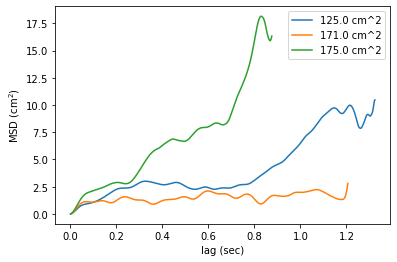

In [65]:
src_lst=['447_1_0',"523_0_1","529_0_0"]
A_lst=[447**2*DS**2,523**2*DS**2,529**2*DS**2]
for A,src in zip(A_lst,src_lst):
    d_in=df[df.src==src]

    DS=0.025#cm per pixel
    DT=2.#ms per frame
    #compute ensemble mean squared displacement
    emsd = trackpy.motion.emsd(d_in, mpp=1., fps=1.,max_lagtime=40000)
    #cast ensemble mean squared displacement into units of cm^2 and seconds
    d_out= pd.DataFrame({'msd':DS**2*emsd.values, 'lagt':emsd.index.values*DT/10**3, 'src':src})


    x_values=d_out.lagt
    y_values=d_out.msd

    plt.plot(x_values,y_values,label=f"{np.around(A)} cm^2")
plt.xlabel('lag (sec)')
plt.ylabel(r'MSD (cm$^2$)')
plt.legend()
plt.show()

In [ ]:
DT=df.t.head(2).diff().dropna().values[0]

In [1]:
df

NameError: name 'df' is not defined

# (optional) visualize angular histograms

In [382]:
#LR results for DT = 0.5 ms
#annihilations aggregated
input_fn="/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/param_qu_tmax_30_Ko_5.4_diffCoef_0.0005_dt_0.5/annihilations_minr_1.0_mindur_20.0.csv"
# # #creations aggregated
# input_fn="/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/param_qu_tmax_30_Ko_5.4_diffCoef_0.0005_dt_0.5/creations_minr_1.0_mindur_20.0.csv"

# #FK results for DT = 0.4 ms
# #annihilations aggregated
# input_fn="/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-fk-200x200/param_set_8_ds_5.0_tmax_10_diffCoef_0.0005/annihilations_minr_1.0_mindur_20.0.csv"
# # #creations aggregated
# input_fn="/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-fk-200x200/param_set_8_ds_5.0_tmax_10_diffCoef_0.0005/creations_minr_1.0_mindur_20.0.csv"

# input_fn=search_for_file()
# input_fn="/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/param_qu_tmax_30_Ko_3.8_diffCoef_0.0005/annihilations/ic001.21_traj_sr_600_mem_0_annihilations.csv"
df=pd.read_csv(input_fn)
df.head()

,pid,pid_deathmate,tdeath,r,theta
0,888,978,118.0,1.366658,0.568870
1,888,978,117.5,1.368553,0.361079
2,888,978,117.0,1.374627,3.011826
3,888,978,116.5,1.376211,2.989086
4,888,978,116.0,1.374350,0.375708


In [383]:
#slice df to a given tdeath
t_values=sorted(set(df.tdeath.values))
# t_values=sorted(set(df.tbirth.values))

# #FK
# tA=t_values[0]#.4
# tB=t_values[9]#4.
# tC=t_values[49]#20.
#LR
tA=t_values[0]
tB=t_values[7]
tC=t_values[39]

print(f"considering angles at times (tA,tB,tC)={(tA,tB,tC)} milliseconds.")

anglesA=df[df.tdeath==tA].theta.values
anglesB=df[df.tdeath==tB].theta.values
anglesC=df[df.tdeath==tC].theta.values

# anglesA=df[df.tbirth==tA].theta.values
# anglesB=df[df.tbirth==tB].theta.values
# anglesC=df[df.tbirth==tC].theta.values


ax_lst=[0,1,2]
color_lst=['C0','C1','C2']
angle_lst=[anglesA,anglesB,anglesC]

considering angles at times (tA,tB,tC)=(0.5, 4.0, 20.0) milliseconds.


In [384]:
#angular histogram viewer from optical_flow
# the area of each bin is proportional to the number of observations in it,
bins=4*16
symmetrize=False
density=True

In [385]:
kwargs={
    'symmetrize':symmetrize,
    'density':density,
    'bins':bins,
    'alpha':0.4
}

x_values=np.linspace(0,2*np.pi,50)
if density:
    y0=1/(bins * np.pi)**0.5
else:
    y0=1/(bins)*angles.size

In [386]:
print(f"the number of events considered is {anglesA.shape[0]}.")

the number of events considered is 5279.


considering angles at times (tA,tB,tC)=(0.5, 4.0, 20.0) milliseconds.


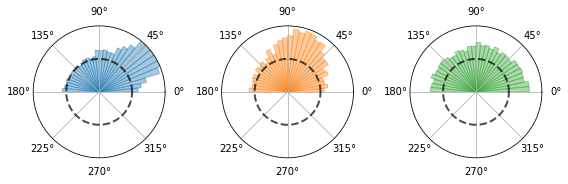

In [387]:
import matplotlib.pyplot as plt
import numpy as np


# Construct figure and axis to plot on
figsize=(8,4)
fig, axs = plt.subplots(ncols=3, subplot_kw=dict(projection='polar'),figsize=figsize)

# Visualise by area of bins
for i,angles,color in zip(ax_lst,angle_lst,color_lst):
    circular_hist(axs[i], x=angles,color=color,edgecolor=color,**kwargs)
    axs[i].plot(x_values,y0+0.*x_values,'k--',lw=2,alpha=0.7)
    axs[i].set_ylim([0,2*y0])
plt.tight_layout()
print(f"considering angles at times (tA,tB,tC)={(tA,tB,tC)} milliseconds.")

plt.show()

# (optional) visualize those other plots for annihilation/creation events

In [299]:
df.sort_values('tdeath',ascending=True,inplace=True)

In [373]:
#LR results for DT = 0.5 ms
#annihilations aggregated
# input_fn="/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/param_qu_tmax_30_Ko_5.4_diffCoef_0.0005_dt_0.5/annihilations_minr_1.0_mindur_20.0.csv"
# # #creations aggregated
# input_fn="/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/param_qu_tmax_30_Ko_5.4_diffCoef_0.0005_dt_0.5/creations_minr_1.0_mindur_20.0.csv"

# #FK results for DT = 0.4 ms
# #annihilations aggregated
# input_fn="/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-fk-200x200/param_set_8_ds_5.0_tmax_10_diffCoef_0.0005/annihilations_minr_1.0_mindur_20.0.csv"
# # #creations aggregated
input_fn="/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-fk-200x200/param_set_8_ds_5.0_tmax_10_diffCoef_0.0005/creations_minr_1.0_mindur_20.0.csv"

# input_fn=search_for_file()
# input_fn="/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/param_qu_tmax_30_Ko_3.8_diffCoef_0.0005/annihilations/ic001.21_traj_sr_600_mem_0_annihilations.csv"
df=pd.read_csv(input_fn)
df.head()

,pid,pid_birthmate,tbirth,r,theta
0,285,284,0.4,0.204170,0.032240
1,285,284,0.8,0.270681,0.036714
2,285,284,1.2,0.321884,0.042506
3,285,284,1.6,0.363609,0.045664
4,285,284,2.0,0.400710,0.062050


In [374]:
t_values

array([  0.5,   1. ,   1.5,   2. ,   2.5,   3. ,   3.5,   4. ,   4.5,
         5. ,   5.5,   6. ,   6.5,   7. ,   7.5,   8. ,   8.5,   9. ,
         9.5,  10. ,  10.5,  11. ,  11.5,  12. ,  12.5,  13. ,  13.5,
        14. ,  14.5,  15. ,  15.5,  16. ,  16.5,  17. ,  17.5,  18. ,
        18.5,  19. ,  19.5,  20. ,  20.5,  21. ,  21.5,  22. ,  22.5,
        23. ,  23.5,  24. ,  24.5,  25. ,  25.5,  26. ,  26.5,  27. ,
        27.5,  28. ,  28.5,  29. ,  29.5,  30. ,  30.5,  31. ,  31.5,
        32. ,  32.5,  33. ,  33.5,  34. ,  34.5,  35. ,  35.5,  36. ,
        36.5,  37. ,  37.5,  38. ,  38.5,  39. ,  39.5,  40. ,  40.5,
        41. ,  41.5,  42. ,  42.5,  43. ,  43.5,  44. ,  44.5,  45. ,
        45.5,  46. ,  46.5,  47. ,  47.5,  48. ,  48.5,  49. ,  49.5,
        50. ,  50.5,  51. ,  51.5,  52. ,  52.5,  53. ,  53.5,  54. ,
        54.5,  55. ,  55.5,  56. ,  56.5,  57. ,  57.5,  58. ,  58.5,
        59. ,  59.5,  60. ,  60.5,  61. ,  61.5,  62. ,  62.5,  63. ,
        63.5,  64. ,

In [375]:
df_phases=df

In [376]:
np.max(r_values)

1.7861593024454532

In [378]:
#slice df to a given tdeath
# t_values=sorted(set(df.tdeath.values))
t_values=sorted(set(df.tbirth.values))

# #FK
# tA=t_values[0]#.4
# tB=t_values[9]#4.
# tC=t_values[49]#20.
#LR
tA=t_values[0]
tB=t_values[7]
tC=t_values[39]

print(f"considering angles at times (tA,tB,tC)={(tA,tB,tC)} milliseconds.")

# anglesA=df[df.tdeath==tA].theta.values
# anglesB=df[df.tdeath==tB].theta.values
# anglesC=df[df.tdeath==tC].theta.values

# # anglesA=df[df.tbirth==tA].theta.values
# # anglesB=df[df.tbirth==tB].theta.values
# # anglesC=df[df.tbirth==tC].theta.values


# ax_lst=[0,1,2]
color_lst=['C0','C1','C2']
# angle_lst=[anglesA,anglesB,anglesC]

considering angles at times (tA,tB,tC)=(0.4, 3.2, 16.0) milliseconds.


In [379]:
DT=sorted(set(df.tdeath.values))[0]

AttributeError: 'DataFrame' object has no attribute 'tdeath'

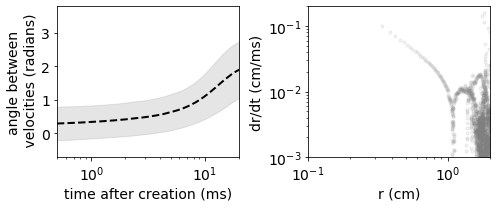

In [380]:
#compute/plot average over particles
N=len(list(set(df_phases.pid.values)))
dfm=df_phases.groupby('tbirth').mean()
dfs=df_phases.groupby('tbirth').std()


# dfm=df_phases.groupby('tdeath').mean()
# dfs=df_phases.groupby('tdeath').std()
x_values=dfm.index.values
y_values=dfm.theta.values
yerr_values=dfs.theta.values

fig,axs=plt.subplots(ncols=2,figsize=(7,3))#(5,4))

ax=axs[0]
ax.fill_between(x_values, y_values-yerr_values, y_values+yerr_values,color='gray',alpha=0.2)
ax.plot(x_values,y_values,'k--',lw=2)
ax.set_xlim([DT,20])
ax.set_xlabel('time after creation (ms)',fontsize=fontsize)

# ax.set_xlabel('time until annihilation (ms)',fontsize=fontsize)
ax.set_ylabel('angle between\n velocities (radians)',fontsize=fontsize)
ax.set_xscale('log')
ax.tick_params(axis='both', which='major', labelsize=fontsize)
ax.tick_params(axis='both', which='minor', labelsize=1)

#plot the mean drdt versus r
t_values=dfm.index.values
range_values=dfm.r.values
drdt_values=np.diff(range_values)/DT
r_values=range_values[1:]/2+range_values[:-1]/2
ax=axs[1]
ax.scatter(r_values,drdt_values,alpha=alpha,label='_Hidden',c='gray',s=10)
ax.set_xscale('log')
ax.set_yscale('log')
ax.tick_params(axis='both', which='major', labelsize=fontsize)
ax.tick_params(axis='both', which='minor', labelsize=1)
ax.set_xlabel('r (cm)',fontsize=fontsize)
ax.set_ylabel('dr/dt (cm/ms)',fontsize=fontsize)
ax.axis([1e-1,2,1e-3,0.2])

plt.tight_layout()
plt.show()

In [363]:
saving=False
savefig_folder=f"{nb_dir}/Figures"
savefig_fn=f"lr-annihilations.png"
fontsize=14
tmax=1e2
alpha=.1
fig,axs=plt.subplots(ncols=3,figsize=(12,4))#(5,4))

# y_values_lst=[dfm.phi1.values,dfm.phi2.values,dfm.phi_sum.values, dfm.phi_diff.values]
# y_values_lst=[phi1_values,phi2_values,phi_sum_values, phi_diff_values]
# y_label_lst=[r'$\phi_1$',r'$\phi_2$',r'$\phi_{sum}$',r'$\phi_{diff}$']
# ax_lst=[0,0,1,1]
# c_lst=['C0','C1','C0','C1']

#extract local particle values
# pid_lst=list(set(df_phases.pid.values))
# for pid in pid_lst:#[:10]:
#     boo=df_phases.pid==pid
t_values=df_phases.tdeath.values
range_values=df_phases.r.values
theta_values=df_phases.theta.values

x_values=t_values
y_values=theta_values
ax=axs[0]
ax.plot(x_values,y_values,alpha=alpha,label='_Hidden',c='gray',lw=2.5)
ax.set_xlabel('time until annihilation (ms)',fontsize=fontsize)
ax.set_ylabel('angle between\n velocities (radians)',fontsize=fontsize)
ax.set_xlim([DT,tmax])
ax.set_xscale('log')
ax.tick_params(axis='both', which='major', labelsize=fontsize)
ax.tick_params(axis='both', which='minor', labelsize=1)

#plot range versus time until death
x_values=t_values
y_values=range_values
ax=axs[1]
ax.scatter(x_values,y_values,alpha=alpha,label='_Hidden',c='gray',lw=2.5)
ax.set_xlabel('time until annihilation (ms)',fontsize=fontsize)
ax.set_ylabel('distance between\nspiral tips (cm)',fontsize=fontsize)
ax.set_xlim([DT,tmax])
ax.set_xscale('log')
ax.set_yscale('log')
ax.tick_params(axis='both', which='major', labelsize=fontsize)
ax.tick_params(axis='both', which='minor', labelsize=1)

# plot angle between versus range (left)
x_values=range_values
y_values=theta_values
ax=axs[2]
ax.scatter(x_values,y_values,alpha=alpha,label='_Hidden',c='gray',s=15)
ax.set_xlabel('distance between\nspiral tips (cm)',fontsize=fontsize)
ax.set_ylabel('angle between\n velocities (radians)',fontsize=fontsize)
ax.set_xlim([1e-2,1])
ax.set_xscale('log')
#     ax.set_yscale('log')
ax.tick_params(axis='both', which='major', labelsize=fontsize)
ax.tick_params(axis='both', which='minor', labelsize=1)   


    
# axs[0].set_title('phi_1 and phi_2 \n',fontsize=fontsize)
# axs[1].set_title('phi_sum and phi_diff \n',fontsize=fontsize)
plt.tight_layout()
# plt.show()
# print(f"\ttime between two frames was {0.001} ms")


plt.tight_layout()
if not saving: 
    plt.show() 
else:
    os.chdir(savefig_folder)
    plt.savefig(savefig_fn, dpi=300)
    print(f"saved figure in \n\t{savefig_fn}")
#     plt.close()

OverflowError: Exceeded cell block limit (set 'agg.path.chunksize' rcparam)

<Figure size 864x288 with 3 Axes>

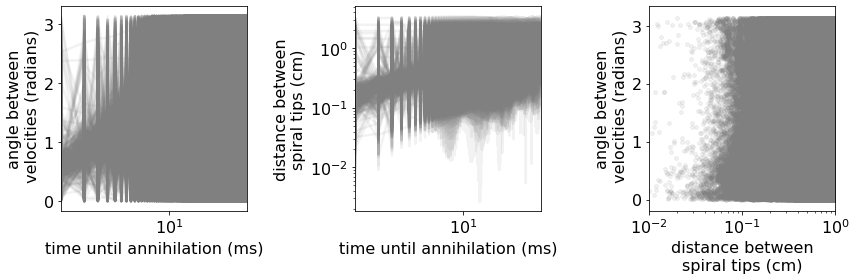

In [327]:
# saving=False
# savefig_folder=f"{nb_dir}/Figures"
# savefig_fn=f"lr-annihilations.png"
# fontsize=14
# tmax=1e2
# alpha=.1
# fig,axs=plt.subplots(ncols=3,figsize=(12,4))#(5,4))

# # y_values_lst=[dfm.phi1.values,dfm.phi2.values,dfm.phi_sum.values, dfm.phi_diff.values]
# # y_values_lst=[phi1_values,phi2_values,phi_sum_values, phi_diff_values]
# # y_label_lst=[r'$\phi_1$',r'$\phi_2$',r'$\phi_{sum}$',r'$\phi_{diff}$']
# # ax_lst=[0,0,1,1]
# # c_lst=['C0','C1','C0','C1']

# #extract local particle values
# pid_lst=list(set(df_phases.pid.values))
# for pid in pid_lst:#[:10]:
#     boo=df_phases.pid==pid
#     t_values=df_phases[boo].tdeath.values
#     range_values=df_phases[boo].r.values
#     theta_values=df_phases[boo].theta.values
    
#     x_values=t_values
#     y_values=theta_values
#     ax=axs[0]
#     ax.plot(x_values,y_values,alpha=alpha,label='_Hidden',c='gray',lw=2.5)
#     ax.set_xlabel('time until annihilation (ms)',fontsize=fontsize)
#     ax.set_ylabel('angle between\n velocities (radians)',fontsize=fontsize)
#     ax.set_xlim([DT,tmax])
#     ax.set_xscale('log')
#     ax.tick_params(axis='both', which='major', labelsize=fontsize)
#     ax.tick_params(axis='both', which='minor', labelsize=1)

#     #plot range versus time until death
#     x_values=t_values
#     y_values=range_values
#     ax=axs[1]
#     ax.plot(x_values,y_values,alpha=alpha,label='_Hidden',c='gray',lw=2.5)
#     ax.set_xlabel('time until annihilation (ms)',fontsize=fontsize)
#     ax.set_ylabel('distance between\nspiral tips (cm)',fontsize=fontsize)
#     ax.set_xlim([DT,tmax])
#     ax.set_xscale('log')
#     ax.set_yscale('log')
#     ax.tick_params(axis='both', which='major', labelsize=fontsize)
#     ax.tick_params(axis='both', which='minor', labelsize=1)

#     # plot angle between versus range (left)
#     x_values=range_values
#     y_values=theta_values
#     ax=axs[2]
#     ax.scatter(x_values,y_values,alpha=alpha,label='_Hidden',c='gray',s=15)
#     ax.set_xlabel('distance between\nspiral tips (cm)',fontsize=fontsize)
#     ax.set_ylabel('angle between\n velocities (radians)',fontsize=fontsize)
#     ax.set_xlim([1e-2,1])
#     ax.set_xscale('log')
# #     ax.set_yscale('log')
#     ax.tick_params(axis='both', which='major', labelsize=fontsize)
#     ax.tick_params(axis='both', which='minor', labelsize=1)   
    

    
# # axs[0].set_title('phi_1 and phi_2 \n',fontsize=fontsize)
# # axs[1].set_title('phi_sum and phi_diff \n',fontsize=fontsize)
# plt.tight_layout()
# # plt.show()
# # print(f"\ttime between two frames was {0.001} ms")


# plt.tight_layout()
# if not saving: 
#     plt.show() 
# else:
#     os.chdir(savefig_folder)
#     plt.savefig(savefig_fn, dpi=300)
#     print(f"saved figure in \n\t{savefig_fn}")
# #     plt.close()

In [305]:
# tA=DT # 0.4 #ms
# tB=2   #ms
# tC=20  #ms
# #iterate over all annihilation events computing/plotting the shortest trajectory if it is long enough and if it gets further than a certain range
# df_deaths=df_phases
# saving=False
# savefig_folder=f"{nb_dir}/Figures"
# savefig_fn=f"angles-between-deaths-b-lr.png"
# # savefig_fn=f"angles-between-deaths-b.png"
# fontsize=16
# bins=6
# tmax=1e2
# #plot naive range at death and birth
# fig,axs=plt.subplots(ncols=2,figsize=(12,5))

# # y_values_lst=[dfm.phi1.values,dfm.phi2.values,dfm.phi_sum.values, dfm.phi_diff.values]
# # y_values_lst=[phi1_values,phi2_values,phi_sum_values, phi_diff_values]
# y_label_lst=[r'$\vartheta$']
# ax_lst=[1]
# c_lst=['gray']
# # angle_threshold=2.3
# val1_lst=[];val2_lst=[];val3_lst=[]
# #extract local particle values
# pid_lst=list(set(df_deaths.pid.values))
# for pid in pid_lst:#[:10]:
#     boo=df_deaths.pid==pid
#     y_values_lst=[df_deaths[boo].theta.values]
#     x_values=df_deaths[boo]['tdeath'].values
#     for y_values,y_label,nax,color in zip(y_values_lst,y_label_lst,ax_lst,c_lst):
#         ax=axs[nax]
#         ax.plot(x_values,y_values,alpha=.3,label='_Hidden',c=color,lw=2.5)

#         boo1=np.isclose(x_values,tA)
#         boo2=np.isclose(x_values,tB)
#         boo3=np.isclose(x_values,tC)
#         val1=y_values[boo1]
#         val2=y_values[boo2]
#         val3=y_values[boo3]
#         if val1.shape[0]>0:
#             val1_lst.append(val1[0])
#             val2_lst.append(val2[0])
#             val3_lst.append(val3[0])
            
# ax.set_xlabel('time until annihilation (ms)',fontsize=fontsize)
# ax.set_ylabel('angle between\n velocities (radians)',fontsize=fontsize)
# ax.set_xlim([DT,tmax])
# ax.set_xscale('log')
# ax.tick_params(axis='both', which='major', labelsize=fontsize)
# ax.tick_params(axis='both', which='minor', labelsize=1)
                
# # fontsize=16
# # fig,ax=plt.subplots(ncols=1,figsize=(5,5))
# ax=axs[0]
# # ax.hist(val1_lst,bins=bins,density=True,color='C0',label=f't=-{tA:.1f} ms',alpha=0.7)
# ax.hist(val2_lst,bins=bins,density=True,color='C1',label=f't=-{tB:.1f} ms',alpha=0.7)
# ax.hist(val3_lst,bins=bins,density=True,color='C2',label=f't=-{tC:.1f} ms',alpha=0.7)
# ax.legend(fontsize=fontsize)
# #plot control
# xv=np.arange(0,np.pi,0.1)
# ax.plot(xv,xv*0.+1/np.pi,'k--')#,color='gray',)
# ax.set_xlabel('angle between\n velocities (radians)',fontsize=fontsize)
# ax.set_ylabel(r'prob. density',fontsize=fontsize)
# ax.tick_params(axis='both', which='major', labelsize=fontsize)
# ax.tick_params(axis='both', which='minor', labelsize=1)
            
# plt.tight_layout()
# # plt.show()
# # print(f"\ttime between two frames was {0.001} ms")
# plt.tight_layout()
# if not saving:
#     plt.show()
# else:
#     os.chdir(savefig_folder)
#     plt.savefig(savefig_fn, dpi=300)
#     print(f"saved figure in \n\t{savefig_fn}")

#     #     plt.close()

In [ ]:
# fontsize=16
# saving=False
# savefig_folder=f"{nb_dir}/Figures"
# savefig_fn=f"fine-death-range-phase.png"
# #plot naive range at death and birth
# fig,axs=plt.subplots(ncols=2,figsize=(12,5))#(5,4))

# # y_values_lst=[dfm.phi1.values,dfm.phi2.values,dfm.phi_sum.values, dfm.phi_diff.values]
# # y_values_lst=[phi1_values,phi2_values,phi_sum_values, phi_diff_values]
# y_label_lst=[r'$\phi_1$',r'$\phi_2$',r'$\phi_{sum}$',r'$\phi_{diff}$']
# ax_lst=[0,0,1,1]
# c_lst=['C0','C1','C0','C1']

# #extract local particle values
# pid_lst=list(set(df_phases.pid.values))
# for pid in pid_lst[:10]:
#     boo=df_phases.pid==pid
#     y_values_lst=[df_phases[boo].phi1.values,df_phases[boo].phi2.values,df_phases[boo].phi_sum.values, df_phases[boo].phi_diff.values]
#     x_values=df_phases[boo].tdeath.values
#     for y_values,y_label,nax,color in zip(y_values_lst,y_label_lst,ax_lst,c_lst):
#         ax=axs[nax]
#         ax.plot(x_values,y_values,alpha=.3,label='_Hidden',c=color,lw=2.5)
#         # plt.scatter(x_values[boo],range_values[boo],c='k',alpha=0.5,s=3)
#         ax.set_xlabel('time until annihilation (ms)',fontsize=fontsize)
#         ax.set_ylabel('signed phase (rad)',fontsize=fontsize)

#         ax.set_xlim([DT,1e1])
#     #     ax.set_ylim([-np.pi/8,np.pi/8])
#         #     ax.set_xlim([1e-3,1e2])
#         ax.set_xscale('log')
#         # plt.yscale('log')
#         ax.tick_params(axis='both', which='major', labelsize=fontsize)
#         ax.tick_params(axis='both', which='minor', labelsize=1)
#     #     ax.legend(fontsize=fontsize)
# axs[0].set_title('phi_1 and phi_2 \n',fontsize=fontsize)
# axs[1].set_title('phi_sum and phi_diff \n',fontsize=fontsize)
# plt.tight_layout()
# # plt.show()
# # print(f"\ttime between two frames was {0.001} ms")
# plt.tight_layout()
# if not saving: 
#     plt.show() 
# else:
#     os.chdir(savefig_folder)
#     plt.savefig(savefig_fn, dpi=300)
#     print(f"saved figure in \n\t{savefig_fn}")
# #     plt.close()

NameError: name 'phi1_values' is not defined

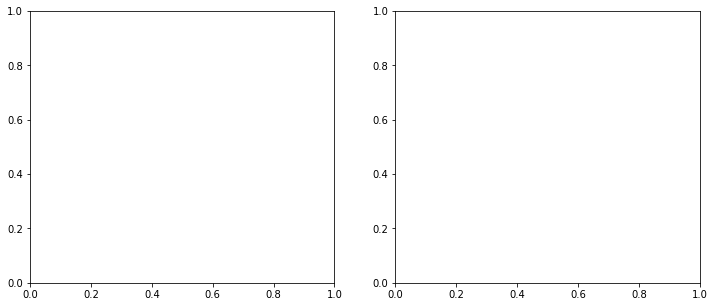

In [287]:
# fontsize=16
# saving=False
# savefig_folder=f"{nb_dir}/Figures/fine_death"
# savefig_fn=f"fine-death-range-phase.png"
# #plot naive range at death and birth
# fig,axs=plt.subplots(ncols=2,figsize=(12,5))#(5,4))

# y_values_lst=[phi1_values,phi2_values,phi_sum_values, phi_diff_values]
# y_label_lst=[r'$\phi_1$',r'$\phi_2$',r'$\phi_{sum}$',r'$\phi_{diff}$']
# ax_lst=[0,0,1,1]
# c_lst=['C0','C1','C0','C1']

# for y_values,y_label,nax,color in zip(y_values_lst,y_label_lst,ax_lst,c_lst):
#     ax=axs[nax]
#     ax.plot(x_values,y_values,alpha=1.0,label=y_label,c=color,lw=2.5)
#     # plt.scatter(x_values[boo],range_values[boo],c='k',alpha=0.5,s=3)
#     ax.set_xlabel('time until annihilation (ms)',fontsize=fontsize)
#     ax.set_ylabel('signed phase (rad)',fontsize=fontsize)

#     ax.set_xlim([DT,1e1])
# #     ax.set_ylim([-np.pi/8,np.pi/8])
#     #     ax.set_xlim([1e-3,1e2])
#     ax.set_xscale('log')
#     # plt.yscale('log')
#     ax.tick_params(axis='both', which='major', labelsize=fontsize)
#     ax.tick_params(axis='both', which='minor', labelsize=1)
#     ax.legend(fontsize=fontsize)

# plt.tight_layout()
# # plt.show()
# # print(f"\ttime between two frames was {0.001} ms")
# plt.tight_layout()
# if not saving: 
#     plt.show() 
# else:
#     os.chdir(savefig_folder)
#     plt.savefig(savefig_fn, dpi=300)
#     print(f"saved figure in \n\t{savefig_fn}")
# #     plt.close()